In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

C = 5.0e-10 + 0.0j # f
L = 5.0e-10 + 0.0j # H

R_l = 50   + 0.0j # Ω
R   = 0.02 + 0.0j # Ω

Lam1 = -0.5*( R_l/L + 1/(R*C) + np.sqrt( (R_l/L - 1/(R*C))**2 - 4/(L*C) ) )
Lam2 = -0.5*( R_l/L + 1/(R*C) - np.sqrt( (R_l/L - 1/(R*C))**2 - 4/(L*C) ) )

U0 = 1    

def calHomSol(Id0, I0, t):

    ans  = Id0 * (     np.exp(Lam1*t) -      np.exp(Lam2*t))/(Lam1-Lam2)
    ans += I0  * (Lam2*np.exp(Lam1*t) - Lam1*np.exp(Lam2*t))/(Lam1-Lam2)

    return ans

def calHomSolDot(Id0, I0, t):

    ans  = Id0 *           (Lam1*np.exp(Lam1*t) - Lam2*np.exp(Lam2*t))/(Lam1-Lam2)
    ans += I0  * Lam2*Lam1*(     np.exp(Lam1*t) -      np.exp(Lam2*t))/(Lam1-Lam2)

    return ans


def calcSqSig(t:np.ndarray, t0):

    ans = np.empty_like(t, dtype=np.complex256)

    ans[t <= t0] = calHomSol(0, U0/(R + R_l), t[t <= t0]) + U0/(R + R_l)

    It0  = calHomSol(   0, U0/(R + R_l), t0) + U0/(R + R_l)
    Idt0 = calHomSolDot(0, U0/(R + R_l), t0)

    ans[t > t0] = calHomSol(Idt0, -It0, t[t > t0]-t0)

    return np.real(ans)



def trueSig(t:np.ndarray, t0):

    ans = np.empty_like(t, dtype=np.complex256)
    ans[t <= t0] = U0/R_l
    ans[t > t0]  = 0

    return np.real(ans)

/home/denys/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
num_points = 197

t = np.linspace(0.0, 9.1e-10, num_points, dtype=np.float128)

sample_rate = 9.1e-10/num_points

## Calculate first square signal

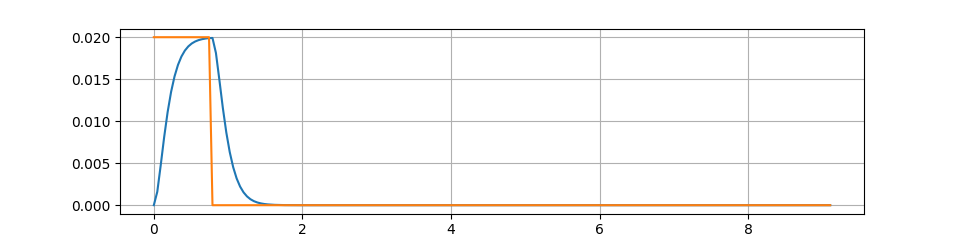

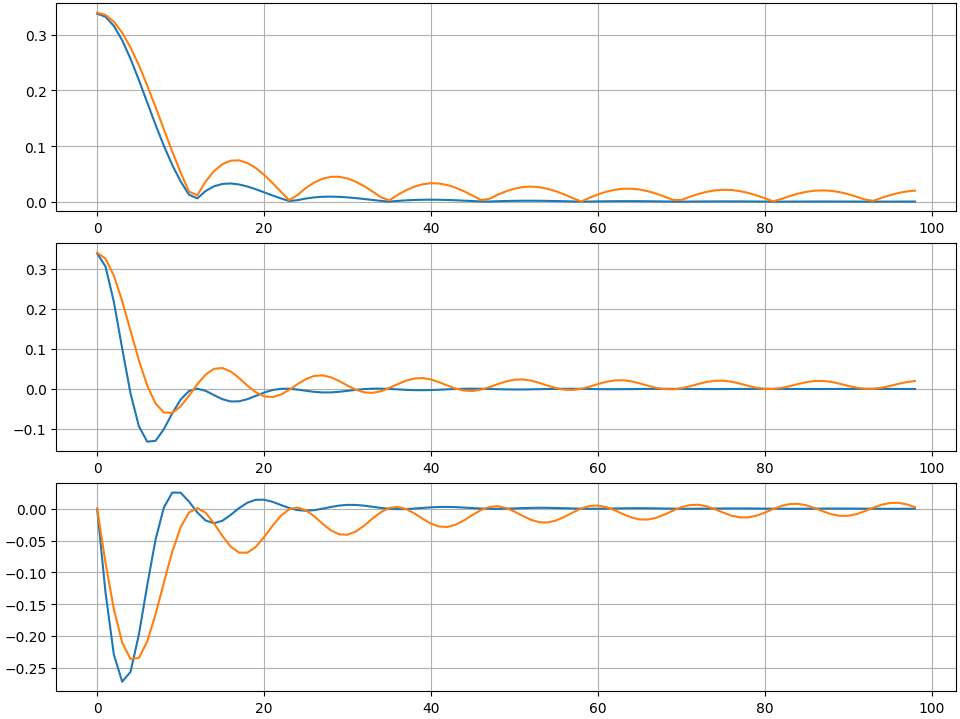

In [3]:
puls_width_1 = 17

t0_1 = puls_width_1*sample_rate

## #### #### #### ####
##  direct signals  ##
## #### #### #### ####

I_1 = calcSqSig(t, t0_1)

plt.figure(figsize=(6.4*3/2, 4.8/2))
plt.plot(t, np.real(I_1))

# I0 = U0/(R + R_l)
# plt.plot([0,0, t0, t0, t[-1], t[-1]], [0, I0, I0, 0, 0, 0])
I_1_true = trueSig(t, t0_1)
plt.plot(t, I_1_true)

plt.grid()

### #### #### #### ####
##  fourrier images  ##
### #### #### #### ####

num_of_comps = 120

tr_I_1      = np.fft.rfft(I_1     )
tr_I_1_true = np.fft.rfft(I_1_true)

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

plt.subplot(3,1,1)
plt.plot(np.abs(tr_I_1     )[:num_of_comps])
plt.plot(np.abs(tr_I_1_true)[:num_of_comps])
plt.grid()

plt.subplot(3,1,2)
plt.plot(np.real(tr_I_1     )[:num_of_comps])
plt.plot(np.real(tr_I_1_true)[:num_of_comps])
plt.grid()

plt.subplot(3,1,3)
plt.plot(np.imag(tr_I_1     )[:num_of_comps])
plt.plot(np.imag(tr_I_1_true)[:num_of_comps])
plt.grid()


## Calculate second square signal

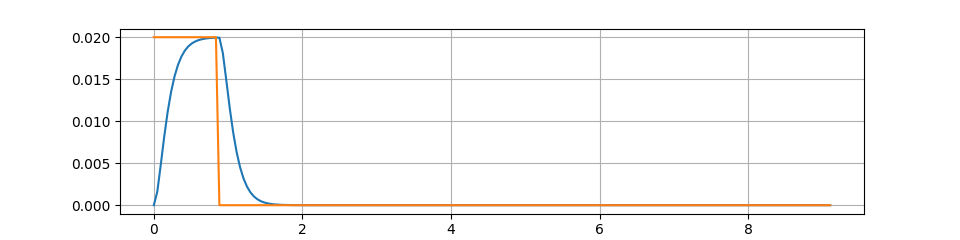

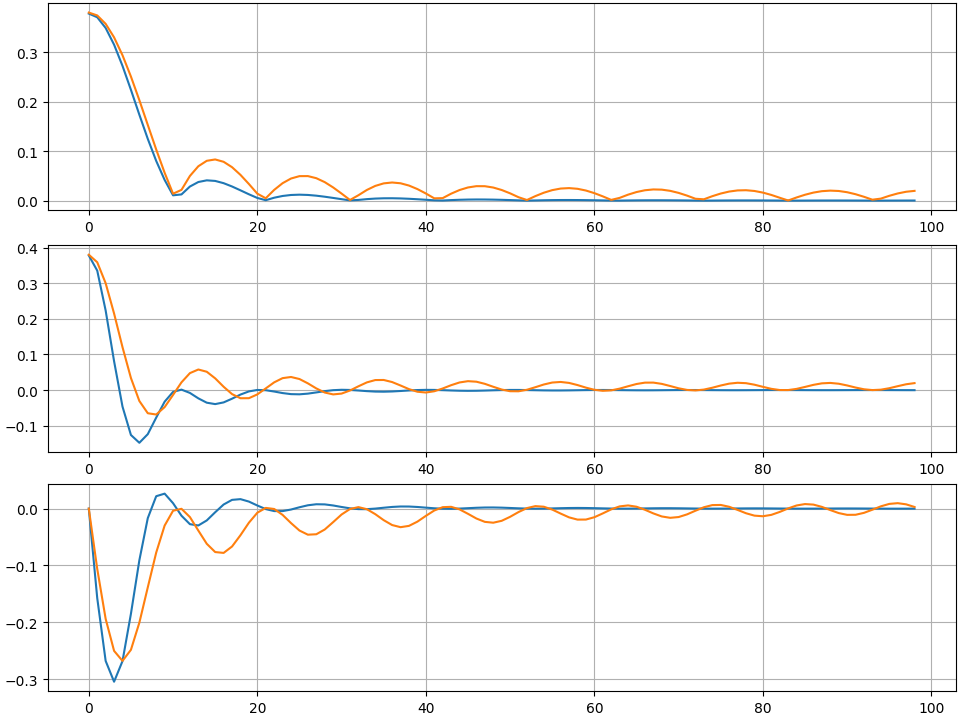

In [4]:
puls_width_2 = 19

t0_2 = puls_width_2*sample_rate

## #### #### #### ####
##  direct signals  ##
## #### #### #### ####

I_2 = calcSqSig(t, t0_2)

plt.figure(figsize=(6.4*3/2, 4.8/2))
plt.plot(t, np.real(I_2))

# I0 = U0/(R + R_l)
# plt.plot([0,0, t0, t0, t[-1], t[-1]], [0, I0, I0, 0, 0, 0])
I_2_true = trueSig(t, t0_2)
plt.plot(t, I_2_true)

plt.grid()

### #### #### #### ####
##  fourrier images  ##
### #### #### #### ####

num_of_comps = 120

tr_I_2      = np.fft.rfft(I_2     )
tr_I_2_true = np.fft.rfft(I_2_true)

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

plt.subplot(3,1,1)
plt.plot(np.abs(tr_I_2     )[:num_of_comps])
plt.plot(np.abs(tr_I_2_true)[:num_of_comps])
plt.grid()

plt.subplot(3,1,2)
plt.plot(np.real(tr_I_2     )[:num_of_comps])
plt.plot(np.real(tr_I_2_true)[:num_of_comps])
plt.grid()

plt.subplot(3,1,3)
plt.plot(np.imag(tr_I_2     )[:num_of_comps])
plt.plot(np.imag(tr_I_2_true)[:num_of_comps])
plt.grid()


## Calculate third square signal

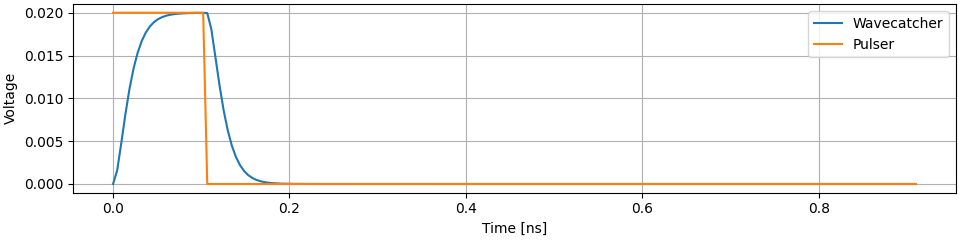

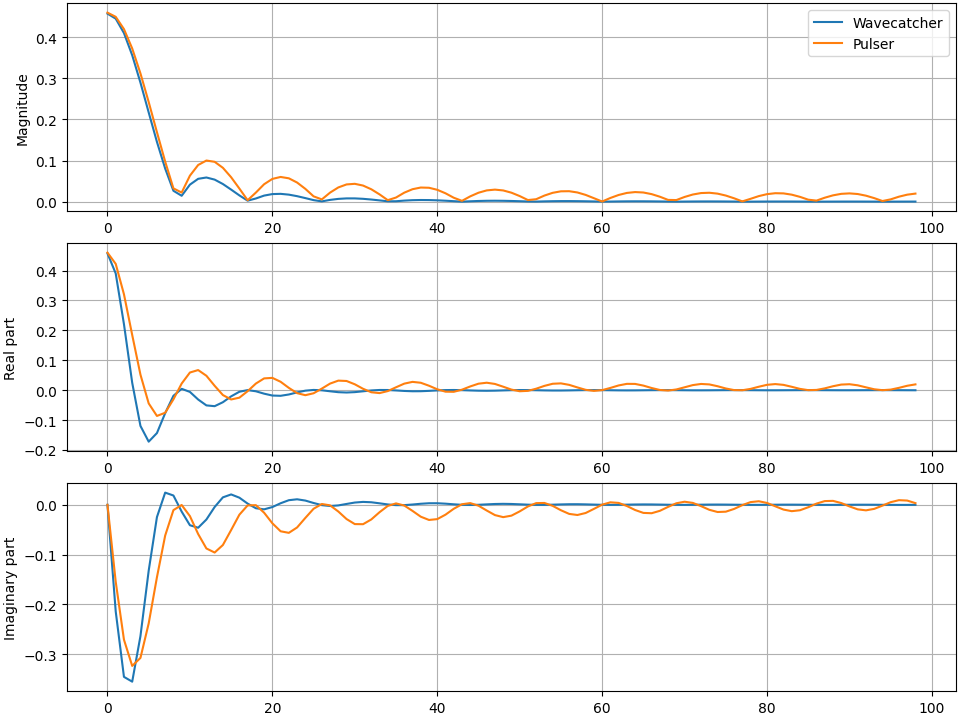

In [5]:
puls_width_3 = 23

t0_3 = puls_width_3*sample_rate

## #### #### #### ####
##  direct signals  ##
## #### #### #### ####

I_3 = calcSqSig(t, t0_3)

plt.figure(figsize=(6.4*3/2, 4.8/2), constrained_layout=True)
plt.plot(t*1e9, np.real(I_3), label="Wavecatcher")

# I0 = U0/(R + R_l)
# plt.plot([0,0, t0, t0, t[-1], t[-1]], [0, I0, I0, 0, 0, 0])
I_3_true = trueSig(t, t0_3)
plt.plot(t*1e9, I_3_true, label="Pulser")

plt.grid()
plt.xlabel("Time [ns]")
plt.ylabel("Voltage")
plt.legend()

### #### #### #### ####
##  fourrier images  ##
### #### #### #### ####

num_of_comps = 120

tr_I_3      = np.fft.rfft(I_3     )
tr_I_3_true = np.fft.rfft(I_3_true)

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

plt.subplot(3,1,1)
plt.plot(np.abs(tr_I_3     )[:num_of_comps], label="Wavecatcher")
plt.plot(np.abs(tr_I_3_true)[:num_of_comps], label="Pulser"     )
plt.legend()
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(3,1,2)
plt.plot(np.real(tr_I_3     )[:num_of_comps])
plt.plot(np.real(tr_I_3_true)[:num_of_comps])
plt.ylabel("Real part")
plt.grid()

plt.subplot(3,1,3)
plt.plot(np.imag(tr_I_3     )[:num_of_comps])
plt.plot(np.imag(tr_I_3_true)[:num_of_comps])
plt.ylabel("Imaginary part")
plt.grid()


## Comparing fourrier imsges

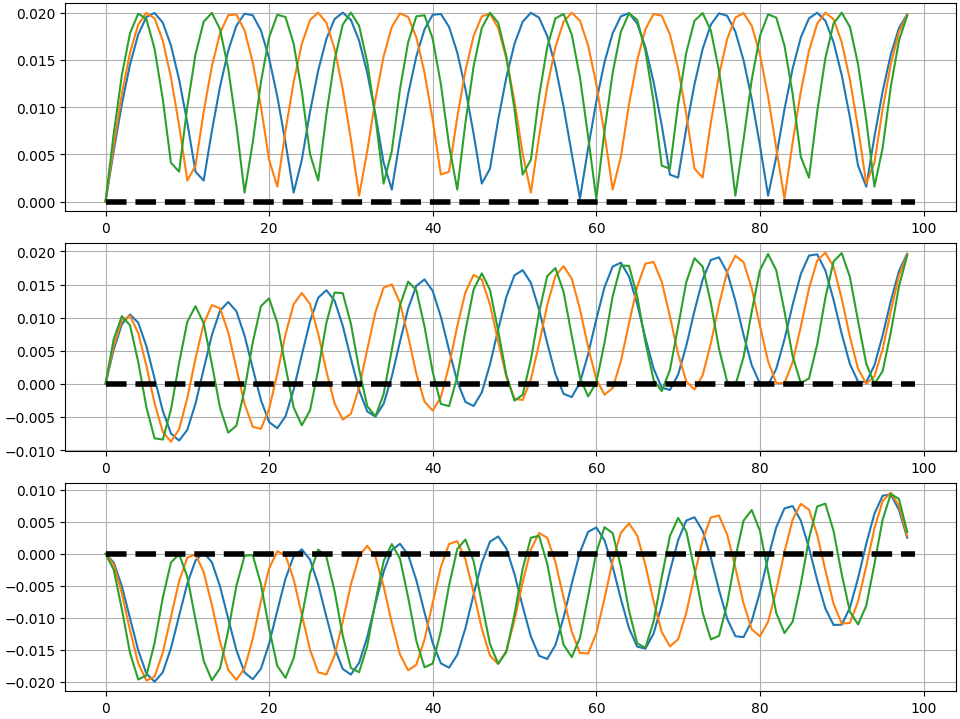

In [6]:
modulation = np.arange(tr_I_2_true.size)
modulation = np.sin(np.pi * modulation / num_points)

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

plt.subplot(3,1,1)
plt.plot((np.abs(tr_I_1_true)*modulation)[:num_of_comps])
plt.plot((np.abs(tr_I_2_true)*modulation)[:num_of_comps])
plt.plot((np.abs(tr_I_3_true)*modulation)[:num_of_comps])
plt.hlines(0, 0, tr_I_2_true.size, colors="black", linestyles = "--", linewidth=4)
plt.grid()

plt.subplot(3,1,2)
plt.plot((np.real(tr_I_1_true)*modulation)[:num_of_comps])
plt.plot((np.real(tr_I_2_true)*modulation)[:num_of_comps])
plt.plot((np.real(tr_I_3_true)*modulation)[:num_of_comps])
plt.hlines(0, 0, tr_I_2_true.size, colors="black", linestyles = "--", linewidth=4)
plt.grid()

plt.subplot(3,1,3)
plt.plot((np.imag(tr_I_1_true)*modulation)[:num_of_comps])
plt.plot((np.imag(tr_I_2_true)*modulation)[:num_of_comps])
plt.plot((np.imag(tr_I_3_true)*modulation)[:num_of_comps])
plt.hlines(0, 0, tr_I_2_true.size, colors="black", linestyles = "--", linewidth=4)
plt.grid()

## Expoential signal

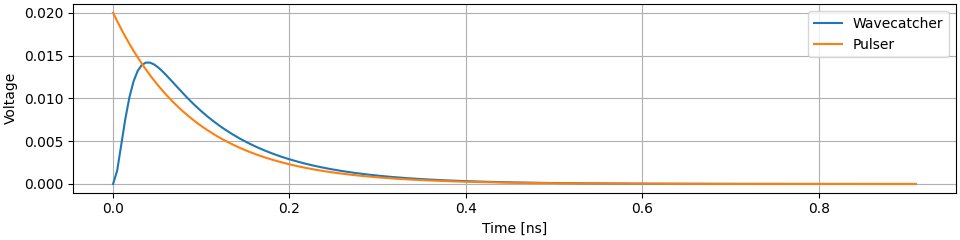

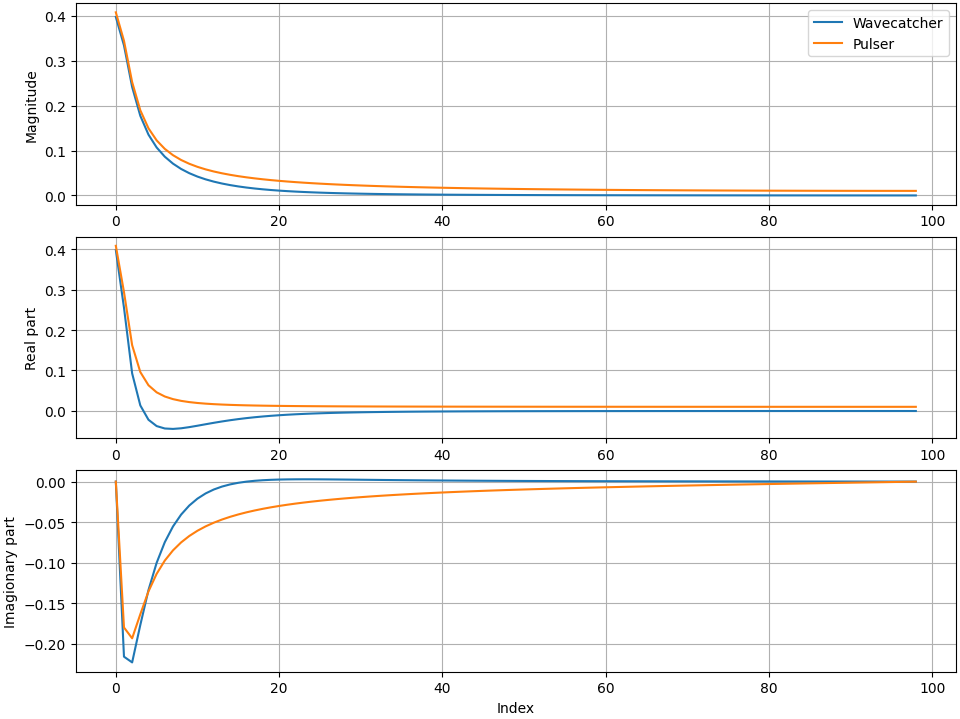

In [7]:
Lam = 1/(20*sample_rate)

D = np.real(U0/(Lam**2*R*C*L - R*C*L*(R_l/L + 1/(R*C))*Lam + R+R_l ))

I_exp = np.real(calHomSol(Lam*D, D, t)) + D*np.exp(-Lam*t)

## #### #### #### ####
##  direct signals  ##
## #### #### #### ####

plt.figure(figsize=(6.4*3/2, 4.8/2), constrained_layout=True)
plt.plot(t*1e9, I_exp, label="Wavecatcher")

I_0 = np.real(U0/R_l)
I_exp_true = I_0*np.exp(-Lam*t)
plt.plot(t*1e9, I_exp_true, label="Pulser")

plt.grid()
plt.xlabel("Time [ns]")
plt.ylabel("Voltage")
plt.legend()

### #### #### #### ####
##  fourrier images  ##
### #### #### #### ####

num_of_comps = 120

tr_I_exp      = np.fft.rfft(I_exp     )
tr_I_exp_true = np.fft.rfft(I_exp_true)

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

plt.subplot(3,1,1)
plt.plot(np.abs(tr_I_exp     )[:num_of_comps], label="Wavecatcher")
plt.plot(np.abs(tr_I_exp_true)[:num_of_comps], label="Pulser"     )
plt.legend()
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(3,1,2)
plt.plot(np.real(tr_I_exp     )[:num_of_comps])
plt.plot(np.real(tr_I_exp_true)[:num_of_comps])
plt.ylabel("Real part")
plt.grid()

plt.subplot(3,1,3)
plt.plot(np.imag(tr_I_exp     )[:num_of_comps])
plt.plot(np.imag(tr_I_exp_true)[:num_of_comps])
plt.ylabel("Imagionary part")
plt.xlabel("Index")
plt.grid()

/tmp/ipykernel_216235/2974791771.py:33: RuntimeWarning: divide by zero encountered in divide
  uncert_1_imag = np.abs(np.sqrt(1+tran_fun_s_1.imag**2)/tr_I_1_true.imag)
/tmp/ipykernel_216235/2974791771.py:34: RuntimeWarning: divide by zero encountered in divide
  uncert_2_imag = np.abs(np.sqrt(1+tran_fun_s_2.imag**2)/tr_I_2_true.imag)
/tmp/ipykernel_216235/2974791771.py:35: RuntimeWarning: divide by zero encountered in divide
  uncert_3_imag = np.abs(np.sqrt(1+tran_fun_s_3.imag**2)/tr_I_3_true.imag)


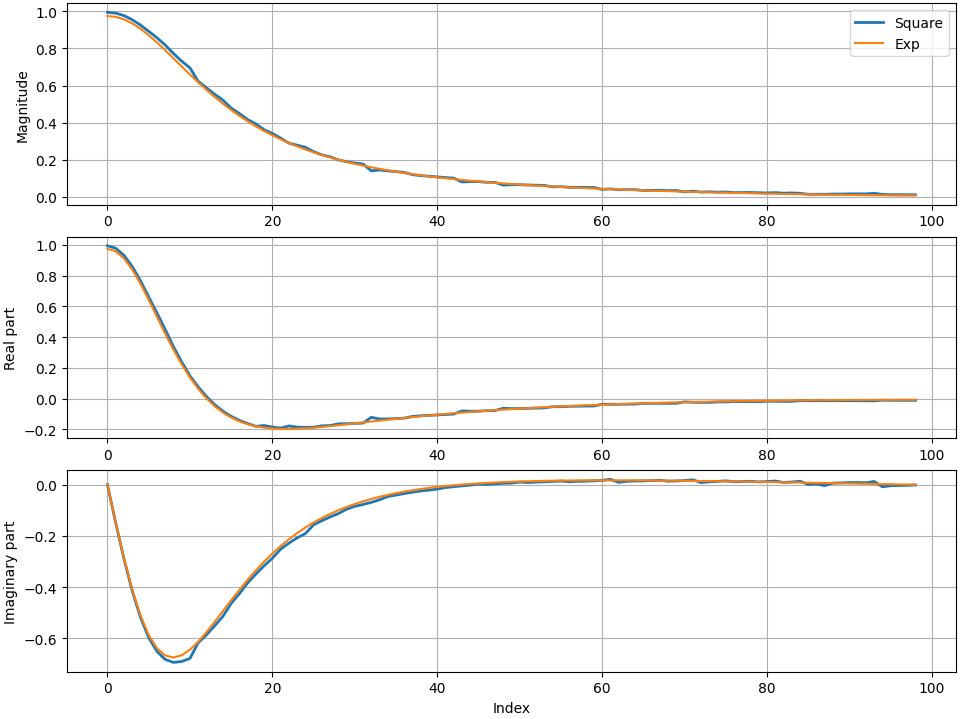

In [8]:
## #### #### #### #### ##
## Transition function ##
## #### #### #### #### ##

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

tran_fun_s_1   = tr_I_1/tr_I_1_true
tran_fun_s_2   = tr_I_2/tr_I_2_true
tran_fun_s_3   = tr_I_3/tr_I_3_true

### #### #### #### #### #### #### ####
## Real part of transition function ##
### #### #### #### #### #### #### ####

uncert_1_real = np.abs(np.sqrt(1+tran_fun_s_1.real**2)/tr_I_1_true.real)
uncert_2_real = np.abs(np.sqrt(1+tran_fun_s_2.real**2)/tr_I_2_true.real)
uncert_3_real = np.abs(np.sqrt(1+tran_fun_s_3.real**2)/tr_I_3_true.real)

# uncert_1_real = 1/np.abs(tr_I_1_true.real)
# uncert_2_real = 1/np.abs(tr_I_2_true.real)

tran_fun_s_real = np.empty_like(tran_fun_s_1, dtype=np.float128)

tran_fun_s_real[(uncert_1_real <= uncert_2_real)*(uncert_1_real <= uncert_3_real)] = tran_fun_s_1[(uncert_1_real <= uncert_2_real)*(uncert_1_real <= uncert_3_real)].real
tran_fun_s_real[(uncert_2_real <  uncert_1_real)*(uncert_2_real <  uncert_3_real)] = tran_fun_s_2[(uncert_2_real <  uncert_1_real)*(uncert_2_real <  uncert_3_real)].real
tran_fun_s_real[(uncert_3_real <  uncert_1_real)*(uncert_3_real <  uncert_2_real)] = tran_fun_s_3[(uncert_3_real <  uncert_1_real)*(uncert_3_real <  uncert_2_real)].real


#### #### #### #### #### #### #### #### ####
## Imagionary part of transition function ##
#### #### #### #### #### #### #### #### ####

uncert_1_imag = np.abs(np.sqrt(1+tran_fun_s_1.imag**2)/tr_I_1_true.imag)
uncert_2_imag = np.abs(np.sqrt(1+tran_fun_s_2.imag**2)/tr_I_2_true.imag)
uncert_3_imag = np.abs(np.sqrt(1+tran_fun_s_3.imag**2)/tr_I_3_true.imag)

# uncert_1_imag = 1/np.abs(tr_I_1_true.imag)
# uncert_2_imag = 1/np.abs(tr_I_2_true.imag)

tran_fun_s_imag = np.empty_like(tran_fun_s_1, dtype=np.float128)

tran_fun_s_imag[(uncert_1_imag <= uncert_2_imag)*(uncert_1_imag <= uncert_3_imag)] = tran_fun_s_1[(uncert_1_imag <= uncert_2_imag)*(uncert_1_imag <= uncert_3_imag)].imag
tran_fun_s_imag[(uncert_2_imag <  uncert_1_imag)*(uncert_2_imag <  uncert_3_imag)] = tran_fun_s_2[(uncert_2_imag <  uncert_1_imag)*(uncert_2_imag <  uncert_3_imag)].imag
tran_fun_s_imag[(uncert_3_imag <  uncert_1_imag)*(uncert_3_imag <  uncert_2_imag)] = tran_fun_s_3[(uncert_3_imag <  uncert_1_imag)*(uncert_3_imag <  uncert_2_imag)].imag


#### #### #### #### #### #### ####
## Comples transition function ##
#### #### #### #### #### #### ####

tran_fun_s = tran_fun_s_real + 1j*tran_fun_s_imag

tran_fun_exp = tr_I_exp/tr_I_exp_true

plt.subplot(3,1,1)
# plt.plot(np.abs(tran_fun_s_1)[:num_of_comps], label="Square 1" )
# plt.plot(np.abs(tran_fun_s_2)[:num_of_comps], label="Square 2" )
plt.plot(np.abs(tran_fun_s  )[:num_of_comps], label = "Square", linewidth = 2)
plt.plot(np.abs(tran_fun_exp)[:num_of_comps], label = "Exp" )
# plt.ylim(0, 1)
plt.legend()
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(3,1,2)
# plt.plot(np.real(tran_fun_s_1)[:num_of_comps] )
# plt.plot(np.real(tran_fun_s_2)[:num_of_comps] )
plt.plot(np.real(tran_fun_s  )[:num_of_comps], linewidth = 2 )
plt.plot(np.real(tran_fun_exp)[:num_of_comps] )
# plt.ylim(-1, 1)
plt.ylabel("Real part")
plt.grid()

plt.subplot(3,1,3)
# plt.plot(np.imag(tran_fun_s_1)[:num_of_comps] )
# plt.plot(np.imag(tran_fun_s_2)[:num_of_comps] )
plt.plot(np.imag(tran_fun_s  )[:num_of_comps], linewidth = 2 )
plt.plot(np.imag(tran_fun_exp)[:num_of_comps] )
# plt.ylim(-1, 1)
plt.ylabel("Imaginary part")
plt.xlabel("Index")
plt.grid()

## Restoring function from its corrected image

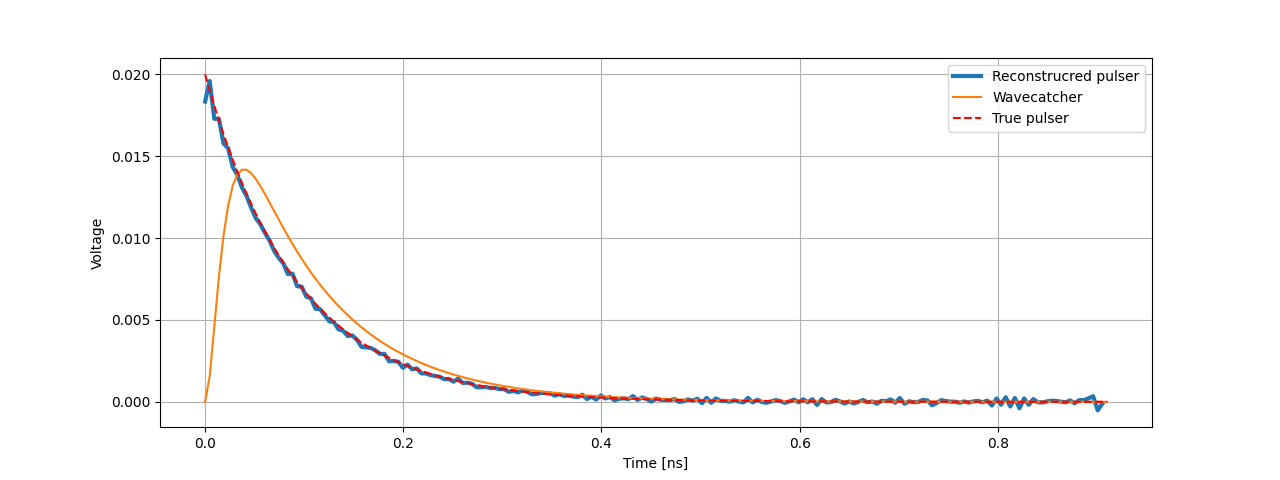

In [9]:
tr_I_exp_restor = tr_I_exp/tran_fun_s

I_exp_restor = np.fft.irfft(tr_I_exp_restor)


plt.figure(figsize=(6.4*2, 4.8))
plt.plot(t[:-1]*1e9, I_exp_restor, linewidth=3, label="Reconstrucred pulser")
plt.plot(t*1e9,      I_exp,                     label="Wavecatcher"         )
plt.plot(t*1e9,      I_exp_true, "--r",         label="True pulser"         )
plt.xlabel("Time [ns]")
plt.ylabel("Voltage")
plt.legend()
plt.grid()